In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("project_root/dataset/breast-cancer-wisconsin-data.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.shape

(569, 32)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
data[data["diagnosis"] == "B"].shape

(357, 32)

In [ ]:
data[data["diagnosis"] == "M"].shape

In [49]:
def train_test_split(training_data_frac, data):
    
    training_data_len = int(0.7 *data.shape[0])
    testing_data_len = int(0.3 *data.shape[0])
    
    pos_class_data = data[data["diagnosis"] == "M"]
    neg_class_data = data[data["diagnosis"] == "B"]
    
    pos_class_training_data = pos_class_data.iloc[0:int(training_data_len//2)]
    pos_class_testing_data = pos_class_data.iloc[int(training_data_len//2):]
    
    neg_class_training_data = neg_class_data.iloc[0:int((training_data_len//2))]
    neg_class_testing_data = neg_class_data.iloc[int(training_data_len//2):]
    
    training_data = pd.concat([pos_class_training_data,neg_class_training_data], axis = 0)

    testing_data = pd.concat([neg_class_testing_data, pos_class_testing_data], axis=0)
    
    return training_data, testing_data

In [41]:
data["diagnosis"].replace({'M': 1, 'B': 0}, inplace=True)


<Axes: >

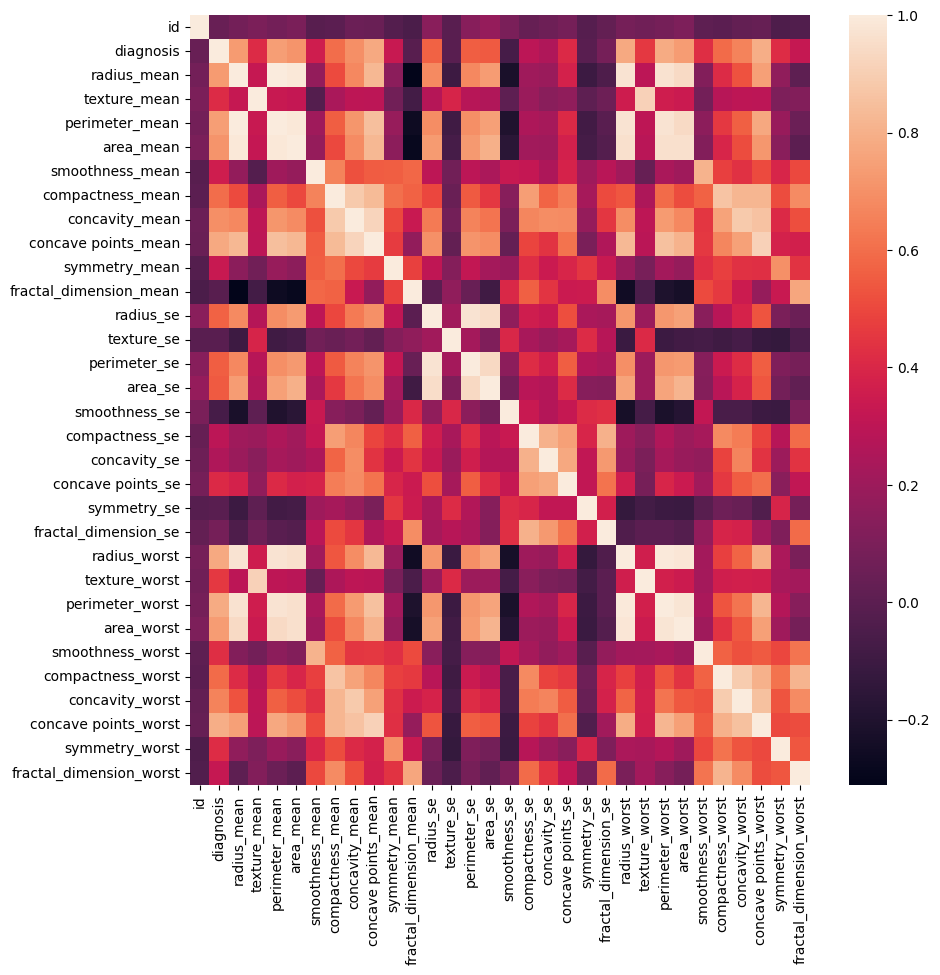

In [42]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())
   

In [43]:
np.linalg.det(data.corr())

np.float64(4.2734625060434696e-32)

In [44]:
data_corr = data.corr()

In [45]:
selected_features = list(data_corr[(data_corr[data.columns[1]] > 0.5)| (data_corr[data.columns[1]] < 0.5) ].index)

In [46]:
selected_features

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [47]:
refined_data = data[selected_features]

In [50]:
refined_training_data,refined_testing_data = train_test_split(0.7, refined_data)